<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-04 22:00:46.050351


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

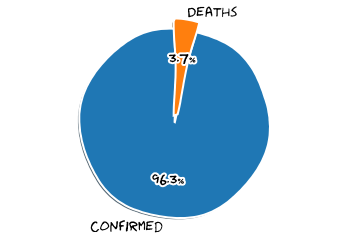

Alabama State Total Population
4887871
Alabama State Confirmed
8027 (0.16422282830295643% of population)
Alabama State Deaths
296 (3.6875545035505173% of confirmed)



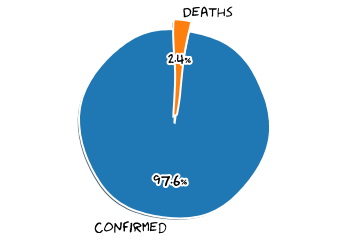

Alaska State Total Population
737438
Alaska State Confirmed
370 (0.050173709518630726% of population)
Alaska State Deaths
9 (2.4324324324324325% of confirmed)



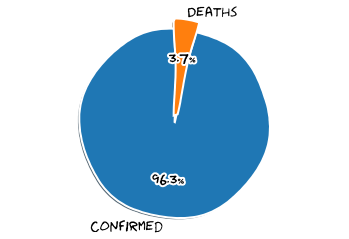

Arizona State Total Population
7171646
Arizona State Confirmed
8921 (0.12439264291628448% of population)
Arizona State Deaths
328 (3.6767178567425174% of confirmed)



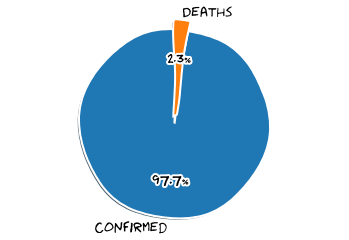

Arkansas State Total Population
3013825
Arkansas State Confirmed
3469 (0.11510290079881878% of population)
Arkansas State Deaths
80 (2.306140098010954% of confirmed)



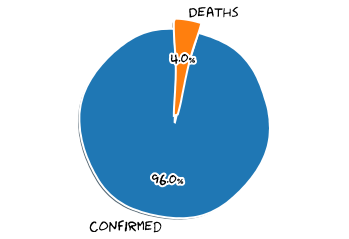

California State Total Population
39557045
California State Confirmed
55071 (0.13921919597381452% of population)
California State Deaths
2220 (4.031159775562456% of confirmed)



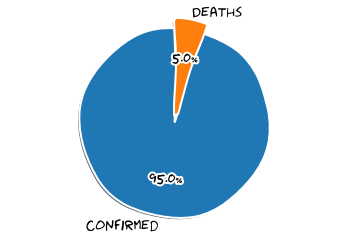

Colorado State Total Population
5695564
Colorado State Confirmed
16635 (0.29206940699814804% of population)
Colorado State Deaths
840 (5.049594229035167% of confirmed)



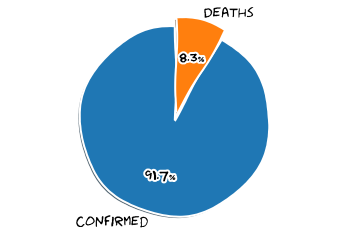

Connecticut State Total Population
3572665
Connecticut State Confirmed
29287 (0.819752201787741% of population)
Connecticut State Deaths
2436 (8.317683613890122% of confirmed)



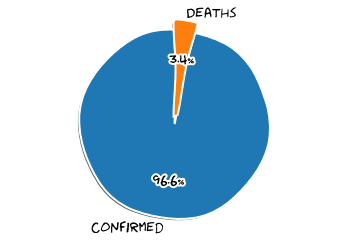

Delaware State Total Population
967171
Delaware State Confirmed
5288 (0.5467492304876801% of population)
Delaware State Deaths
182 (3.4417549167927386% of confirmed)



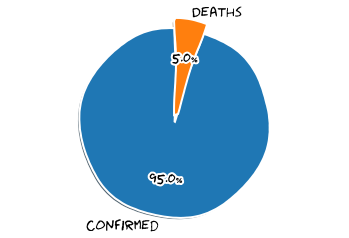

District of Columbia State Total Population
702455
District of Columbia State Confirmed
5170 (0.7359902057783061% of population)
District of Columbia State Deaths
258 (4.990328820116054% of confirmed)



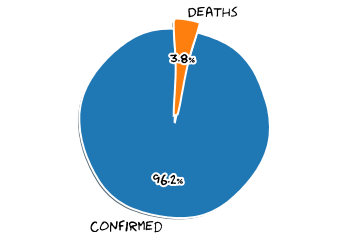

Florida State Total Population
21299325
Florida State Confirmed
36897 (0.1732308418224521% of population)
Florida State Deaths
1399 (3.791636176382904% of confirmed)



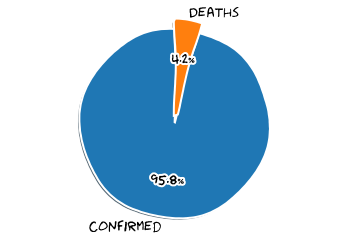

Georgia State Total Population
10519475
Georgia State Confirmed
29369 (0.2791869366104297% of population)
Georgia State Deaths
1221 (4.157444924920835% of confirmed)



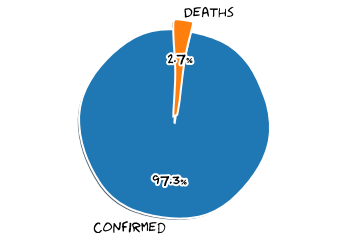

Hawaii State Total Population
1420491
Hawaii State Confirmed
620 (0.04364687984647562% of population)
Hawaii State Deaths
17 (2.741935483870968% of confirmed)



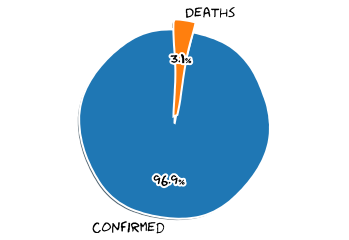

Idaho State Total Population
1754208
Idaho State Confirmed
2061 (0.11748891807584962% of population)
Idaho State Deaths
64 (3.1052886948083454% of confirmed)



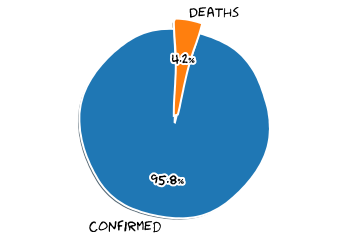

Illinois State Total Population
12741080
Illinois State Confirmed
63822 (0.5009151500500743% of population)
Illinois State Deaths
2661 (4.169408667857478% of confirmed)



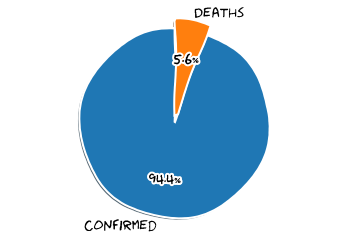

Indiana State Total Population
6691878
Indiana State Confirmed
20507 (0.3064461127354683% of population)
Indiana State Deaths
1151 (5.612717608621446% of confirmed)



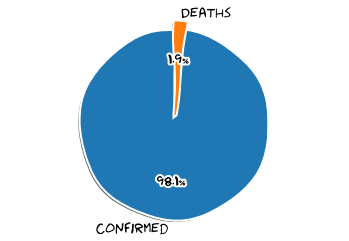

Iowa State Total Population
3156145
Iowa State Confirmed
9703 (0.3074320096193299% of population)
Iowa State Deaths
188 (1.9375450891476864% of confirmed)



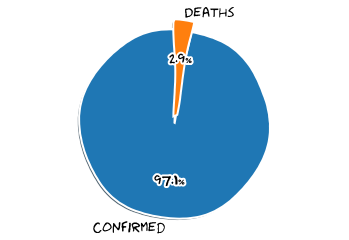

Kansas State Total Population
2911510
Kansas State Confirmed
5325 (0.18289478655405614% of population)
Kansas State Deaths
154 (2.892018779342723% of confirmed)



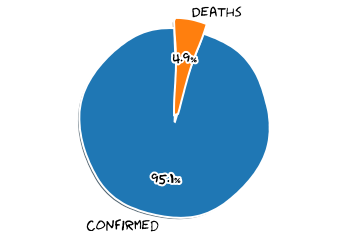

Kentucky State Total Population
4468402
Kentucky State Confirmed
5130 (0.11480614322525146% of population)
Kentucky State Deaths
253 (4.9317738791423% of confirmed)



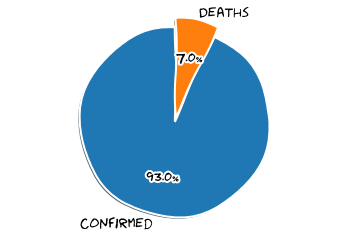

Louisiana State Total Population
4659978
Louisiana State Confirmed
29673 (0.6367626628280219% of population)
Louisiana State Deaths
2064 (6.955818420786573% of confirmed)



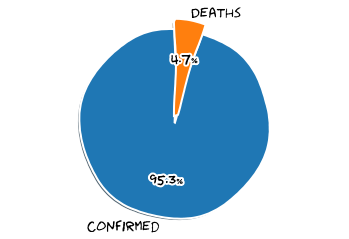

Maine State Total Population
1338404
Maine State Confirmed
1205 (0.09003260599938434% of population)
Maine State Deaths
57 (4.730290456431535% of confirmed)



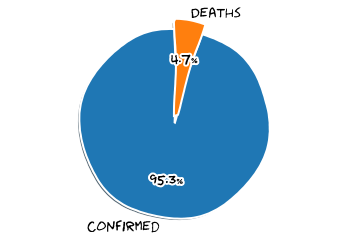

Maryland State Total Population
6042718
Maryland State Confirmed
26408 (0.4370218831989181% of population)
Maryland State Deaths
1240 (4.695546803998788% of confirmed)



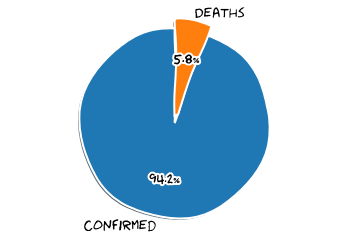

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
69406 (1.0055708736510904% of population)
Massachusetts State Deaths
4004 (5.768953692764314% of confirmed)



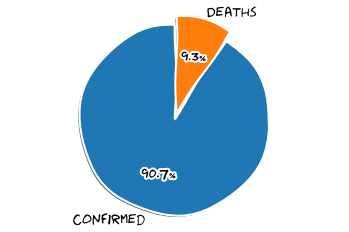

Michigan State Total Population
9995915
Michigan State Confirmed
43801 (0.4381890002065844% of population)
Michigan State Deaths
4053 (9.253213396954408% of confirmed)



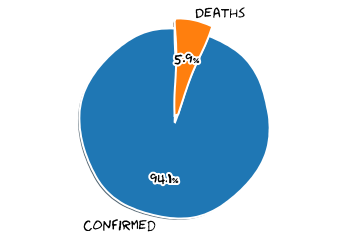

Minnesota State Total Population
5611179
Minnesota State Confirmed
7234 (0.12892121245820176% of population)
Minnesota State Deaths
427 (5.902681780481061% of confirmed)



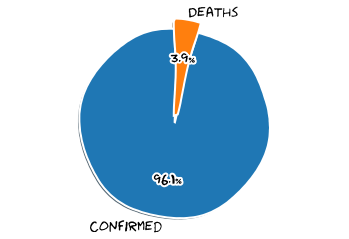

Mississippi State Total Population
2986530
Mississippi State Confirmed
7877 (0.2637509082446853% of population)
Mississippi State Deaths
310 (3.935508442300368% of confirmed)



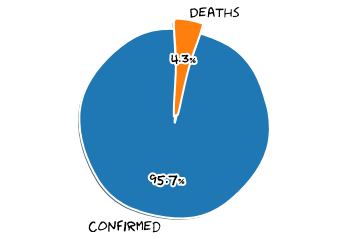

Missouri State Total Population
6126452
Missouri State Confirmed
8916 (0.14553284674392292% of population)
Missouri State Deaths
386 (4.329295648272768% of confirmed)



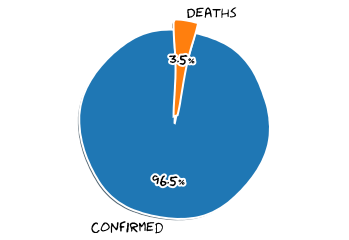

Montana State Total Population
1062305
Montana State Confirmed
457 (0.04301966007879093% of population)
Montana State Deaths
16 (3.50109409190372% of confirmed)



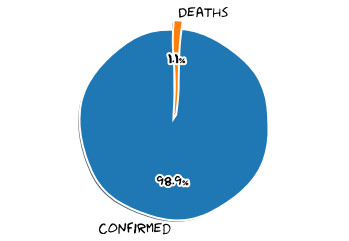

Nebraska State Total Population
1929268
Nebraska State Confirmed
5891 (0.30534897173435727% of population)
Nebraska State Deaths
67 (1.137328127652351% of confirmed)



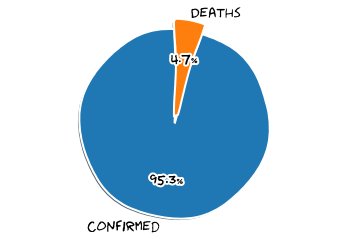

Nevada State Total Population
3034392
Nevada State Confirmed
5621 (0.18524304045093712% of population)
Nevada State Deaths
262 (4.661092332325209% of confirmed)



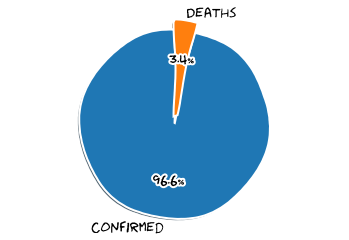

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
2518 (0.1856305171262214% of population)
New Hampshire State Deaths
86 (3.415409054805401% of confirmed)



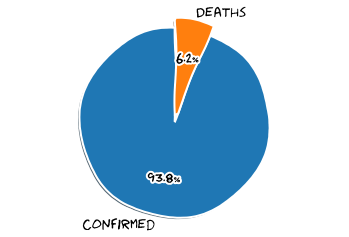

New Jersey State Total Population
8908520
New Jersey State Confirmed
128269 (1.439846349337488% of population)
New Jersey State Deaths
7910 (6.166727736241804% of confirmed)



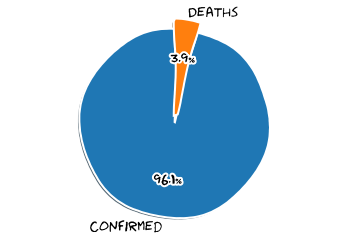

New Mexico State Total Population
2095428
New Mexico State Confirmed
3850 (0.18373334707754216% of population)
New Mexico State Deaths
150 (3.896103896103896% of confirmed)



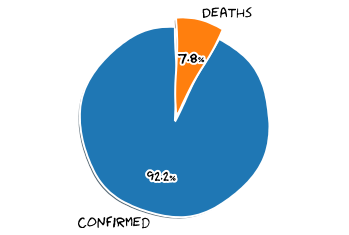

New York State Total Population
19542209
New York State Confirmed
318953 (1.6321235741568418% of population)
New York State Deaths
24892 (7.8042846438189954% of confirmed)



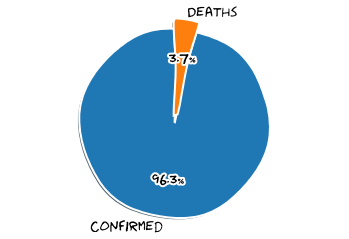

North Carolina State Total Population
10383620
North Carolina State Confirmed
11971 (0.11528734680198234% of population)
North Carolina State Deaths
442 (3.6922562860245596% of confirmed)



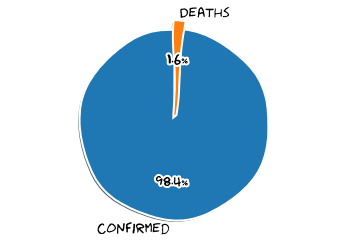

North Dakota State Total Population
760077
North Dakota State Confirmed
1225 (0.1611678816751461% of population)
North Dakota State Deaths
19 (1.5510204081632653% of confirmed)



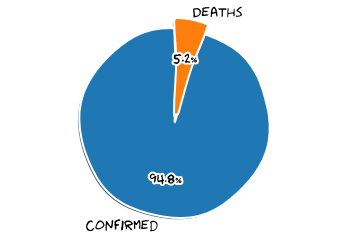

Ohio State Total Population
11689442
Ohio State Confirmed
20474 (0.17514950670870347% of population)
Ohio State Deaths
1057 (5.162645306242063% of confirmed)



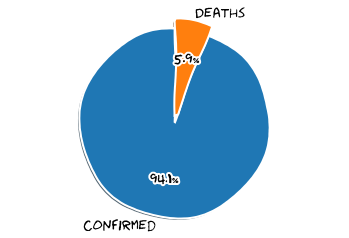

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
4044 (0.1025594465644741% of population)
Oklahoma State Deaths
238 (5.885262116716122% of confirmed)



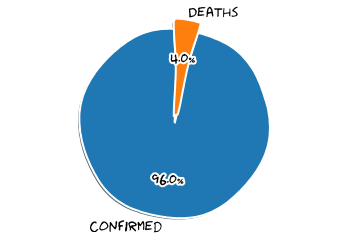

Oregon State Total Population
4190713
Oregon State Confirmed
2759 (0.06583605224218408% of population)
Oregon State Deaths
109 (3.95070677781805% of confirmed)



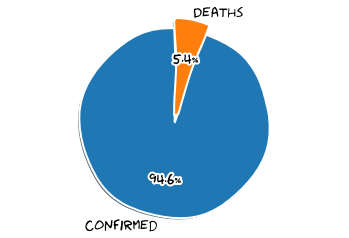

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
52816 (0.4123975369835075% of population)
Pennsylvania State Deaths
2838 (5.373371705543774% of confirmed)



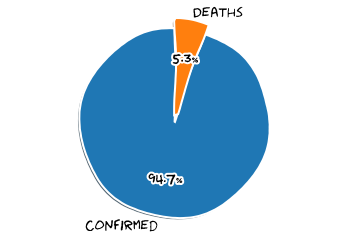

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
1843 (0.05768111886973801% of population)
Puerto Rico State Deaths
97 (5.263157894736842% of confirmed)



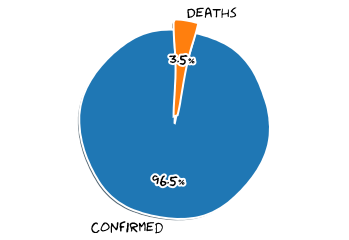

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
9652 (0.9128783758860889% of population)
Rhode Island State Deaths
341 (3.53294653957729% of confirmed)



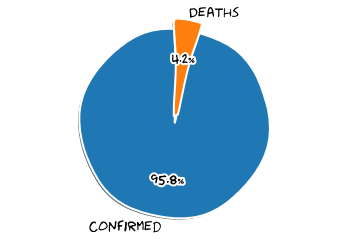

South Carolina State Total Population
5084127
South Carolina State Confirmed
6641 (0.13062222875235022% of population)
South Carolina State Deaths
276 (4.156000602318928% of confirmed)



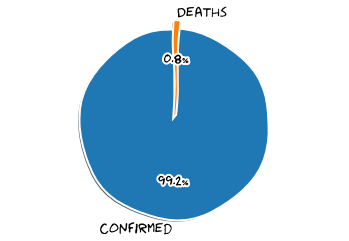

South Dakota State Total Population
882235
South Dakota State Confirmed
2668 (0.3024137559720483% of population)
South Dakota State Deaths
21 (0.7871064467766117% of confirmed)



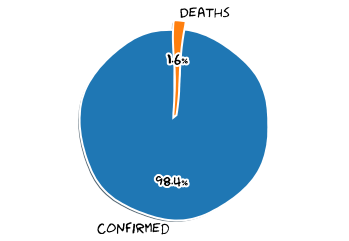

Tennessee State Total Population
6770010
Tennessee State Confirmed
13271 (0.19602629833633925% of population)
Tennessee State Deaths
210 (1.582397709290935% of confirmed)



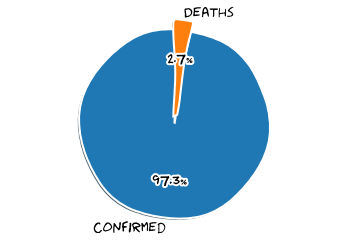

Texas State Total Population
28701845
Texas State Confirmed
32582 (0.11351883476480346% of population)
Texas State Deaths
892 (2.7377079368976736% of confirmed)



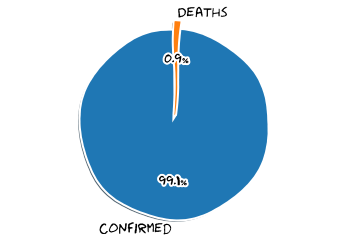

Utah State Total Population
3161105
Utah State Confirmed
5318 (0.1682323111696701% of population)
Utah State Deaths
50 (0.9402030838661152% of confirmed)



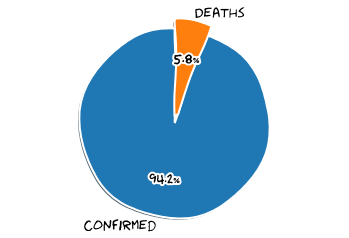

Vermont State Total Population
626299
Vermont State Confirmed
902 (0.14402066744478276% of population)
Vermont State Deaths
52 (5.764966740576496% of confirmed)



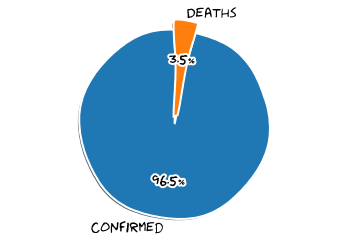

Virginia State Total Population
8517685
Virginia State Confirmed
19493 (0.22885326235943218% of population)
Virginia State Deaths
684 (3.508951931462576% of confirmed)



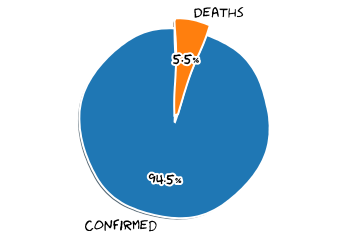

Washington State Total Population
7535591
Washington State Confirmed
15185 (0.20151040575317847% of population)
Washington State Deaths
834 (5.492262100757326% of confirmed)



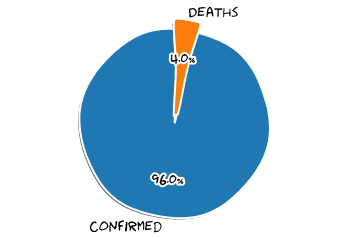

West Virginia State Total Population
1805832
West Virginia State Confirmed
1207 (0.06683899720461262% of population)
West Virginia State Deaths
48 (3.9768019884009944% of confirmed)



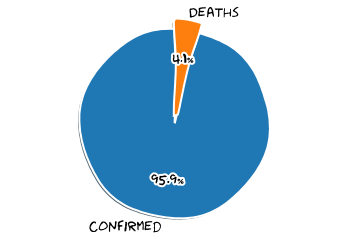

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
8236 (0.14166859319440317% of population)
Wisconsin State Deaths
340 (4.12821758135017% of confirmed)



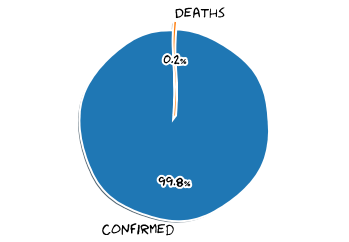

Wyoming State Total Population
577737
Wyoming State Confirmed
586 (0.1014302355570095% of population)
Wyoming State Deaths
1 (0.17064846416382254% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1177001
US Deaths
68244

New York City Confirmed
175651
New York City Deaths
19057

Philippines Confirmed
9485
Philippines Deaths
623



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 3573864},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 250687},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-04T21:32:32.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1159015},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-04 02:32:28,34.22333378,-82.46170658,33,0,0,33,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-04 02:32:28,30.295064899999996,-92.41419698,134,10,0,124,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-04 02:32:28,37.76707161,-75.63234615,400,6,0,394,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-04 02:32:28,43.4526575,-116.24155159999998,705,17,0,688,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-04 02:32:28,41.33075609,-94.47105874,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,,,,West Bank and Gaza,2020-05-04 02:32:28,31.9522,35.2332,353,2,77,274,West Bank and Gaza
3194,,,,Western Sahara,2020-05-04 02:32:28,24.2155,-12.8858,6,0,5,1,Western Sahara
3195,,,,Yemen,2020-05-04 02:32:28,15.552726999999999,48.516388,10,2,1,7,Yemen
3196,,,,Zambia,2020-05-04 02:32:28,-13.133897,27.849332,124,3,78,43,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588624350000,40.767273,-73.971526,175651,0,19057,156594,New York City,36061,"New York City, New York, US",2106.931218,None,None,84036061,USA
1,Illinois,US,1588624350000,41.841448,-87.816588,43715,0,1802,41913,Cook,17031,"Cook, Illinois, US",848.796550,None,None,84017031,USA
2,New York,US,1588624350000,40.740665,-73.589419,36965,0,1792,35173,Nassau,36059,"Nassau, New York, US",2724.176151,None,None,84036059,USA
3,New York,US,1588624350000,40.883201,-72.801217,35077,0,1273,33804,Suffolk,36103,"Suffolk, New York, US",2375.523246,None,None,84036103,USA
4,New York,US,1588624350000,41.162784,-73.757417,30097,0,1101,28996,Westchester,36119,"Westchester, New York, US",3110.781742,None,None,84036119,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,West Virginia,US,1588627952000,37.612327,-81.545111,1,0,0,1,Wyoming,54109,"Wyoming, West Virginia, US",4.903403,None,None,84054109,USA
2867,North Carolina,US,1588627952000,35.900792,-82.312372,1,0,0,1,Yancey,37199,"Yancey, North Carolina, US",5.534341,None,None,84037199,USA
2868,Texas,US,1588627952000,33.173202,-102.827643,1,0,0,1,Yoakum,48501,"Yoakum, Texas, US",11.477103,None,None,84048501,USA
2869,Alaska,US,1588627952000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588624350000,40.767273,-73.971526,175651,0,19057,156594,New York City,36061,"New York City, New York, US",2106.931218,None,None,84036061,USA
2,New York,US,1588624350000,40.740665,-73.589419,36965,0,1792,35173,Nassau,36059,"Nassau, New York, US",2724.176151,None,None,84036059,USA
3,New York,US,1588624350000,40.883201,-72.801217,35077,0,1273,33804,Suffolk,36103,"Suffolk, New York, US",2375.523246,None,None,84036103,USA
4,New York,US,1588624350000,41.162784,-73.757417,30097,0,1101,28996,Westchester,36119,"Westchester, New York, US",3110.781742,None,None,84036119,USA
17,New York,US,1588624350000,41.150279,-74.025605,12095,0,519,11576,Rockland,36087,"Rockland, New York, US",3712.525592,None,None,84036087,USA
20,New York,US,1588624350000,41.403375,-74.302408,9015,0,329,8686,Orange,36071,"Orange, New York, US",2341.923417,None,None,84036071,USA
55,New York,US,1588624350000,42.762490,-78.730637,3802,0,266,3536,Erie,36029,"Erie, New York, US",413.844751,None,None,84036029,USA
63,New York,US,1588624350000,41.764861,-73.743567,3131,0,37,3094,Dutchess,36027,"Dutchess, New York, US",1064.176903,None,None,84036027,USA
111,New York,US,1588624350000,43.146389,-77.693229,1595,0,121,1474,Monroe,36055,"Monroe, New York, US",215.026221,None,None,84036055,USA
126,New York,US,1588624350000,41.890279,-74.262521,1354,0,37,1317,Ulster,36111,"Ulster, New York, US",762.503308,None,None,84036111,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

318953

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588624350000,40.767273,-73.971526,175651,0,19057,156594,New York City,36061,"New York City, New York, US",2106.931218,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
60,None,Philippines,1588627952000,12.879721,121.774017,9485,1315,623,7547,None,None,Philippines,8.655691,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
